Now we will focus on Senator Voting data. This data provides information about senator vote $x$ and senator political affiliation $y$. We provide you with four different vectors $(a_1, a_2, a_3, a_4)$ precomputed by the EECS127 staff. Each of these vectors can be used to define a linear function $f_a: x \rightarrow a^Tx$.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
senator_df =  pd.read_csv('data_matrix.csv', index_col=0)
a_vectors = np.loadtxt('vectors.txt').reshape(4, 542)
affiliation_file = open("politician_labels.txt", "r")
affiliations = np.array([line.split('\n')[0].split(' ')[1] for line in affiliation_file.readlines()])

In [6]:
senator_df.head()

,bill_type bill_name bill_ID,missing_votes,Arlen Specter (PA),Barack H. Obama (IL),BarbaraA Mikulski(MD),BarbaraBoxer(CA),Bill Nelson(FL),BlancheL.Lincoln(AR),ByronL.Dorgan(ND),C.SaxbyChambliss(GA),...,SusanM.Collins(ME),TedStevens(AK),ThadCochran(MS),ThomasAllen'Tom'Coburn(OK),ThomasRichardCarper(DE),Thomas'Tom'Harkin(IA),TimP.Johnson(SD),TrentLott(MS),WayneA.Allard(CO),WilliamH.'Bill'Frist(TN)
2,Appropriations_Transit Security Amendment_3866,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
3,Budget_Spending_and_Taxes_2007 Budget Resoluti...,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
4,"""Budget, Spending and Taxes_Debt Limit Increas...",0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
5,"""Budget, Spending and Taxes_Education Funding ...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
6,"Budget, Spending and Taxes_Reinstate Pay-As-Yo...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0


Now that we have collected all the data, we will clean the senator voting data and convert it to numerical format

In [13]:
X = np.array(senator_df.values[:-1, 2:], dtype='float64')
print(X.shape)

(542, 100)


In [29]:
# TODO: Center the data matrix X by removing to each column its mean
# I know this is inefficient and ugly
print(X.shape)
X_bar = np.zeros(X.shape)
col_means = X.mean(axis=0)
for col in range(X.shape[1]):
    for row in range(X.shape[0]):
        X_bar[row,col] = X[row,col] - col_means[col]
print(X_bar)

(542, 100)
[[ 0.50922509  0.87638376  0.6900369  ... -1.46494465 -1.26752768
  -1.5       ]
 [ 0.50922509 -1.12361624 -1.3099631  ...  0.53505535  0.73247232
   0.5       ]
 [ 0.50922509 -1.12361624 -1.3099631  ...  0.53505535  0.73247232
   0.5       ]
 ...
 [ 0.50922509 -0.12361624  0.6900369  ...  0.53505535 -0.26752768
   0.5       ]
 [ 0.50922509 -0.12361624 -1.3099631  ...  0.53505535 -0.26752768
   0.5       ]
 [ 0.50922509 -0.12361624 -1.3099631  ...  0.53505535 -0.26752768
   0.5       ]]


In [33]:
# TODO: compute for each vector a the score of each senator
senator_scores = np.zeros(shape=(4, 100))
senator_scores = np.dot(a_vectors, X_bar)

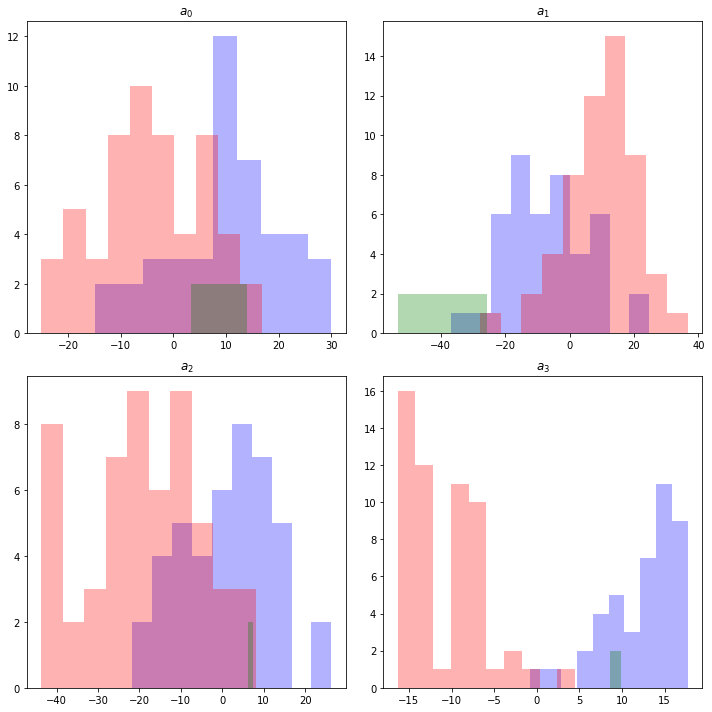

In [37]:
# Then we help you visualizing the scores with the library matplotlib
f, axarr = plt.subplots(2, 2,figsize=(10, 10))
for i in range(4):
    axarr[i // 2,  i % 2].hist(senator_scores[i, affiliations == "Blue"], color="Blue", alpha=0.3)
    axarr[i // 2,  i % 2].hist(senator_scores[i, affiliations == "Red"], color="Red", alpha=0.3)
    axarr[i // 2,  i % 2].hist(senator_scores[i, affiliations == "Yellow"], color="Green", bins=1, alpha=0.3)
    axarr[i // 2,  i % 2].set_title(r'$a_'+ str(i)  +'$')
plt.tight_layout()
#plt.show()
plt.savefig('exercise_6.png', dpi=300)